# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Andreas Wirawan Dananjaya
- Email: andreaswdananjaya@gmail.com
- Id Dicoding: andreaswd31

## Persiapan

### Menyiapkan library yang dibutuhkan

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import pickle
import os

# Setting visualisasi dan tampilan data
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

### Menyiapkan data yang akan diguankan

## Data Understanding

In [53]:
def read_csv_semicolon(filepath, **kwargs):
    return pd.read_csv(filepath, sep=";", **kwargs)

df = read_csv_semicolon('data.csv')

Tahap awal eksplorasi untuk memahami struktur data, tipe data, dan komposisi variabel target

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [55]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Distribusi Target Variabel (Status)**

In [56]:
df['Status'].value_counts(normalize=True) * 100

Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64

##### EDA

Melakukan visualisasi hubungan antara variabel-variabel utama (nilai akademik, status keuangan) dan variabel target (Status) untuk mendapatkan insight yang akan memandu feature selection dan business dashboard.

**Analisis Kinerja Akademik vs Status**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31716\1834724541.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_approved', palette='viridis')


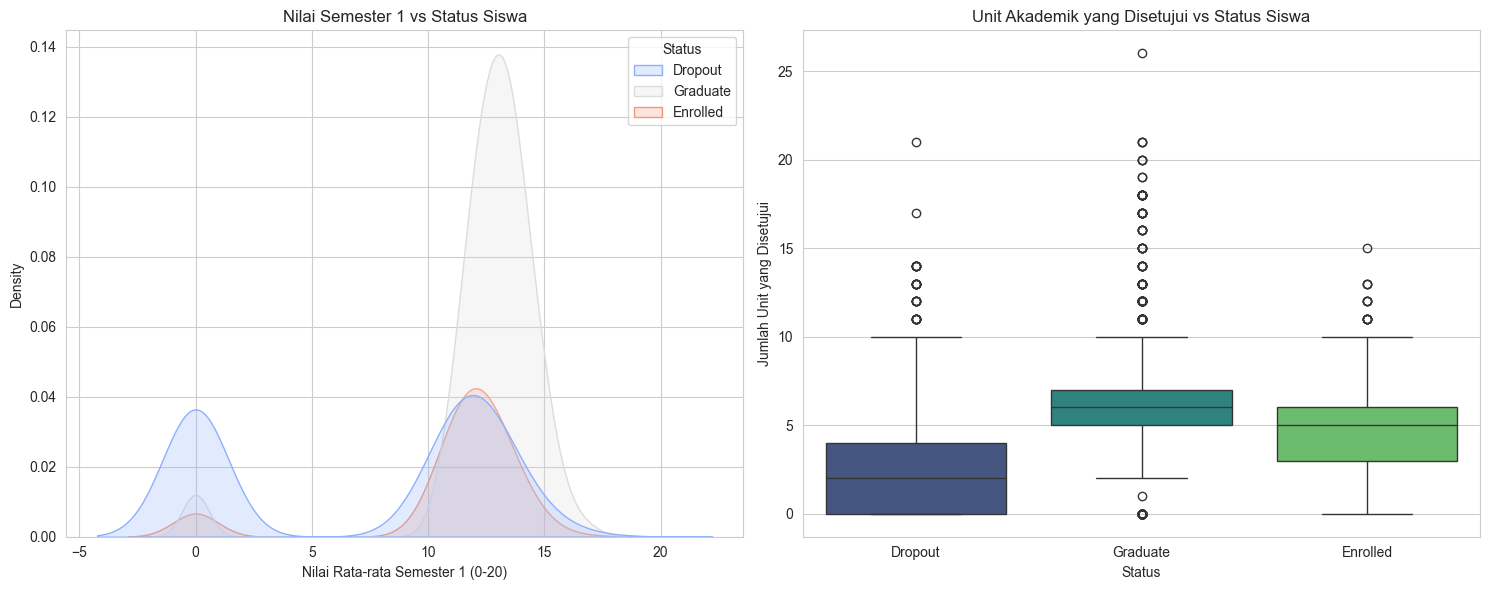

In [57]:
academic_features = ['Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_approved']

plt.figure(figsize=(15, 6))

# Visual 1: Distribusi Nilai Rata-rata Semester 1 vs Status
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Curricular_units_1st_sem_grade', hue='Status', fill=True, palette='coolwarm')
plt.title('Nilai Semester 1 vs Status Siswa')
plt.xlabel('Nilai Rata-rata Semester 1 (0-20)')

# Visual 2: Jumlah Unit yang Disetujui vs Status
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_approved', palette='viridis')
plt.title('Unit Akademik yang Disetujui vs Status Siswa')
plt.ylabel('Jumlah Unit yang Disetujui')

plt.tight_layout()
plt.show()

Faktor Akademik
1. Nilai Semester 1 (Grade) Terdapat perbedaan distribusi.
- Siswa Graduate (Abu-abu) memiliki nilai rata-rata tinggi (sekitar 14-15).
- Siswa Dropout (Biru) memiliki distribusi nilai yang jauh lebih rendah (puncak di bawah 10).
- **Insight**: Nilai Semester 1 adalah prediktor utama.

2. Unit yang Disetujui (Approved Units)
- Siswa Dropout memiliki median unit yang disetujui sangat rendah (median = 0 atau 1).
- Siswa Graduate memiliki median unit yang disetujui tinggi (median $\approx 6$).
- **Insight**: Jumlah unit yang disetujui pada semester pertama sangat membedakan status siswa.

**Analisis Faktor Finansial/Sosial vs Status**

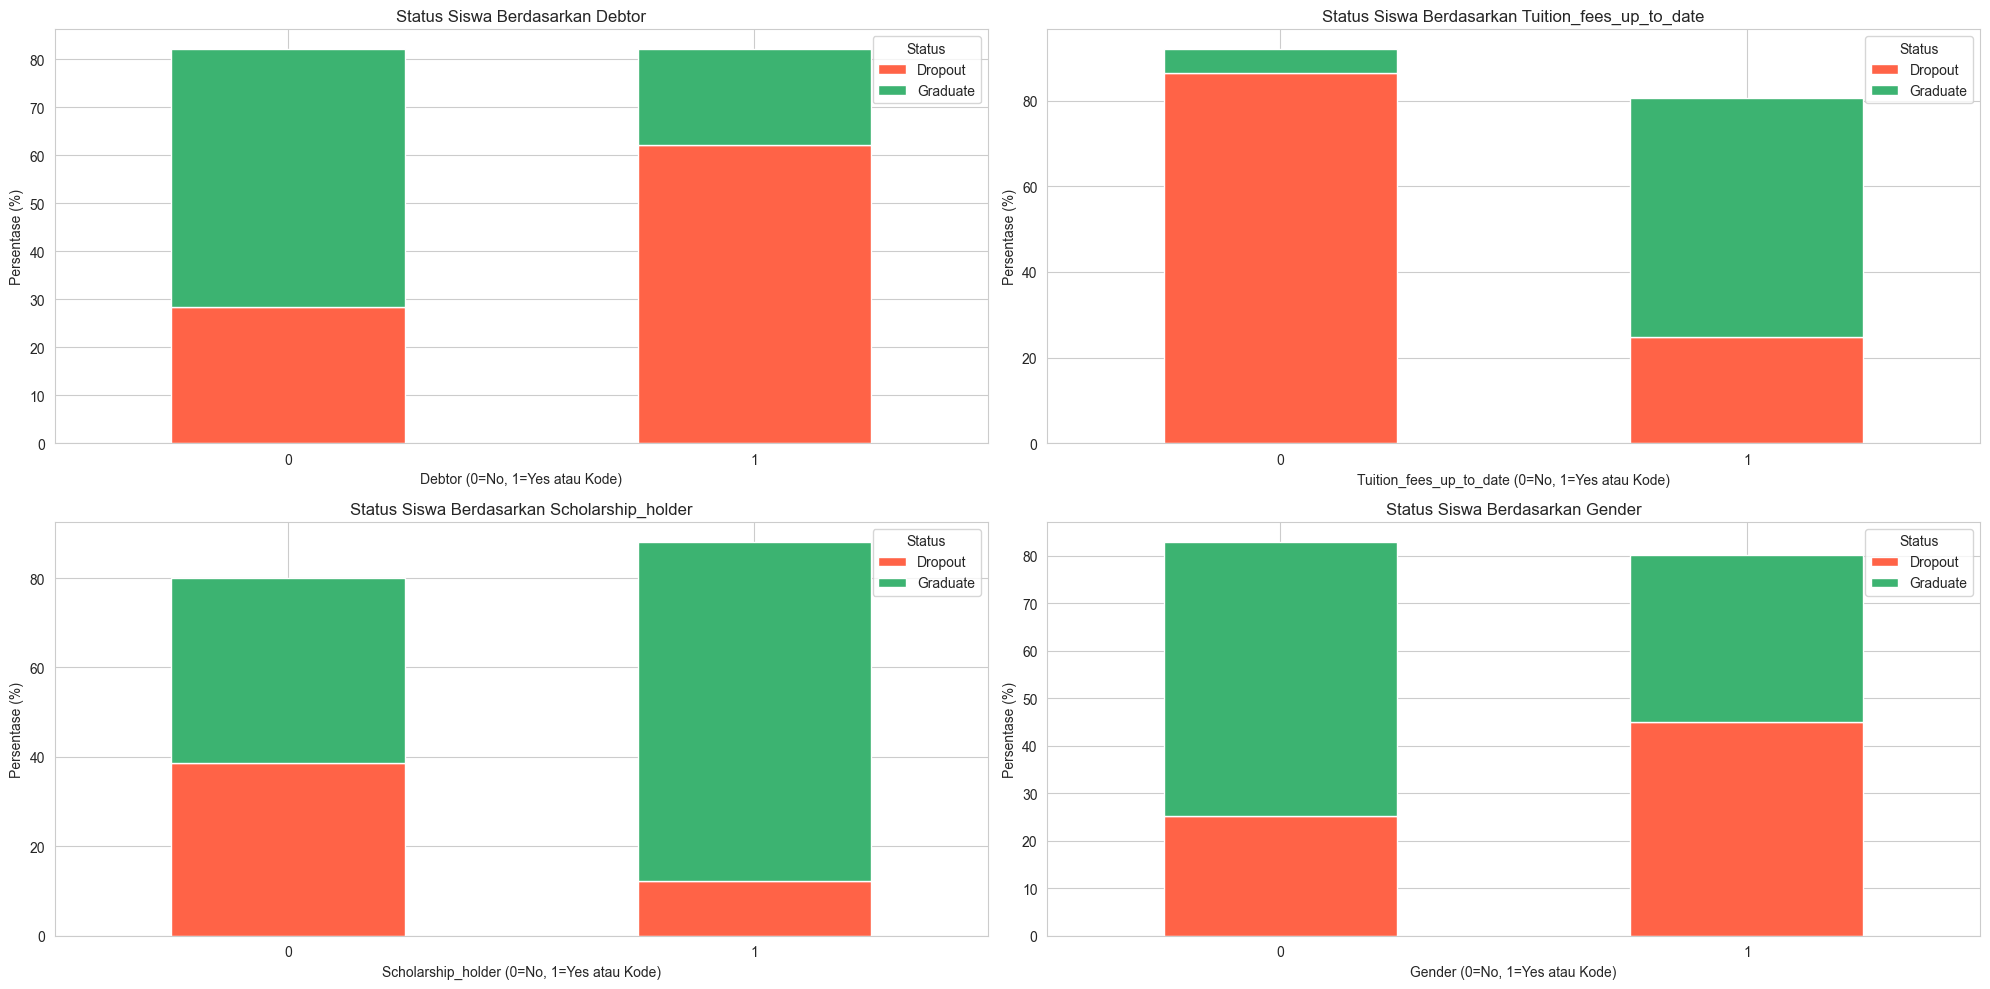

In [58]:
financial_social_features = ['Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Gender']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(financial_social_features):
    plt.subplot(2, 2, i + 1)
    # Hitung persentase Status per kategori
    status_by_feature = pd.crosstab(df[feature], df['Status'], normalize='index') * 100
    
    # Plot hanya untuk kelas Dropout dan Graduate (untuk perbandingan)
    status_by_feature[['Dropout', 'Graduate']].plot(kind='bar', stacked=True, ax=plt.gca(), color=['#FF6347', '#3CB371'])
    
    plt.title(f'Status Siswa Berdasarkan {feature}')
    plt.ylabel('Persentase (%)')
    plt.xlabel(f'{feature} (0=No, 1=Yes atau Kode)')
    plt.legend(title='Status')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Faktor Sosial & Finansial (Kebutuhan Intervensi HR)**

1. Status Pembayaran (Tuition fees up to date)
- Ketika biaya kuliah TIDAK diperbarui (0), rasio Dropout sangat tinggi (sekitar 50%).
- Ketika biaya kuliah YA diperbarui (1), rasio Dropout turun drastis (sekitar 20%).
- **Insight**: Status pembayaran memiliki korelasi langsung dengan risiko dropout.

2. Status Debtor
- Siswa yang berstatus Debtor (1) memiliki rasio Dropout yang jauh lebih tinggi dibandingkan yang bukan.

3. Scholarship Holder
- Siswa yang TIDAK memegang beasiswa (0) memiliki rasio Dropout yang jauh lebih tinggi daripada yang memegang beasiswa.

## Data Preparation / Preprocessing

**Cek Missiong Value**

In [59]:
df.isnull().sum().sum()

0

**Cek Duplikasi**

In [60]:
df.duplicated().sum()

0

##### **Konversi Target Variabel (Status) menjadi numerik**

In [61]:
le = LabelEncoder()
df['Target_Encoded'] = le.fit_transform(df['Status'])

print("Mapping Status ke Numerik:")
for i, status in enumerate(le.classes_):
    print(f"{i}: {status}")

Mapping Status ke Numerik:
0: Dropout
1: Enrolled
2: Graduate


##### **Identifikasi Fitur**

Memisahkan variabel target (y) dan features (X). Fitur dikategorikan menjadi numerik dan kategorikal (termasuk kolom biner yang dienkode sebagai integer).

**Pisahkan Fitur (X) dan Target (y)**

In [62]:
X = df.drop(['Status', 'Target_Encoded'], axis=1) 
y = df['Target_Encoded']    

In [63]:
kolom_integer_kategorikal = [
    'Marital_status', 'Application_mode', 'Application_order', 'Course', 
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 
    'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 
    'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', ]

**Kolom Kontinu (Float) dan yang akan di-Scaling**

In [64]:
numerical_features = X.select_dtypes(include=['float64']).columns.tolist()
numerical_features.extend([col for col in X.select_dtypes(include=['int64']).columns.tolist() if col not in kolom_integer_kategorikal])

**Fitur yang akan di One-Hot Encode**

In [65]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist() # Tidak ada kolom object di df.info, tapi jaga-jaga.
categorical_features.extend(kolom_integer_kategorikal)

In [66]:
print(f"Fitur Numerik (untuk Scaling): {len(numerical_features)}")
print(f"Fitur Kategorikal (untuk OHE): {len(categorical_features)}")

Fitur Numerik (untuk Scaling): 18
Fitur Kategorikal (untuk OHE): 18


**Pembagian data dan Preprocessor**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Column Transformer untuk Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

Shape X_train: (3539, 36)
Shape X_test: (885, 36)


In [73]:
# Hitung modus untuk kolom kategorikal dan median untuk numerik
default_data = {}

# Daftar semua kolom (36 kolom)
all_columns = X.columns.tolist()

for col in all_columns:
    if col in categorical_features:
        # Gunakan Modus untuk fitur kategorikal (kode integer)
        # Ambil modus dari data training
        default_data[col] = X_train[col].mode()[0]
    elif col in numerical_features:
        # Gunakan Median untuk fitur numerik/float
        default_data[col] = X_train[col].median()
    else:
        # Kasus darurat, seharusnya tidak terjadi
        default_data[col] = 0

# Buat DataFrame default dengan satu baris
df_default = pd.DataFrame([default_data])

# Simpan DataFrame default (ini akan menjadi kerangka input untuk Streamlit)
df_default.to_csv('model/default_input_structure.csv', index=False)
print("File 'model/default_input_structure.csv' berhasil dibuat.")

File 'model/default_input_structure.csv' berhasil dibuat.


## Modeling

Projek ini menggunakan Random Forest Classifier karena kemampuannya menangani fitur campuran dan masalah klasifikasi multi-kelas (Dropout, Enrolled, Graduate). Model ini diintegrasikan ke dalam Pipeline bersama preprocessor untuk memastikan konsistensi dalam preprocessing data baru. Kami juga mengatur class_weight='balanced' untuk mengatasi imbalance kelas yang ada.

In [68]:
rf_model = RandomForestClassifier(n_estimators=300, 
                                  max_depth=15, 
                                  random_state=42, 
                                  class_weight='balanced',
                                  n_jobs=-1)

**Pipeline (Preprocessing + Model)**

In [69]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rf_model)])

**Melatih dan menyimpan Model**

In [70]:
pipeline.fit(X_train, y_train)

print("Model Random Forest berhasil dilatih.")

# Simpan model untuk Deployment Streamlit (Wajib Kriteria 4)
model_path = 'model/student_dropout_pipeline.pkl'
if not os.path.exists('model'):
    os.makedirs('model')
    
# Simpan Pipeline lengkap
with open(model_path, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Model ML telah disimpan ke {model_path}")

Model Random Forest berhasil dilatih.
Model ML telah disimpan ke model/student_dropout_pipeline.pkl


## Evaluation

Model diuji pada data test. Metrik utama yang digunakan adalah Classification Report dan Confusion Matrix untuk menilai kemampuan model dalam mengidentifikasi kelas 'Dropout' secara spesifik, serta Feature Importance untuk memvalidasi temuan EDA.

**Metrik dan Feature Importance**

--- Classification Report ---
              precision    recall  f1-score   support

     Dropout       0.82      0.71      0.76       284
    Enrolled       0.48      0.48      0.48       159
    Graduate       0.81      0.88      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.76      0.76      0.75       885


--- Confusion Matrix ---


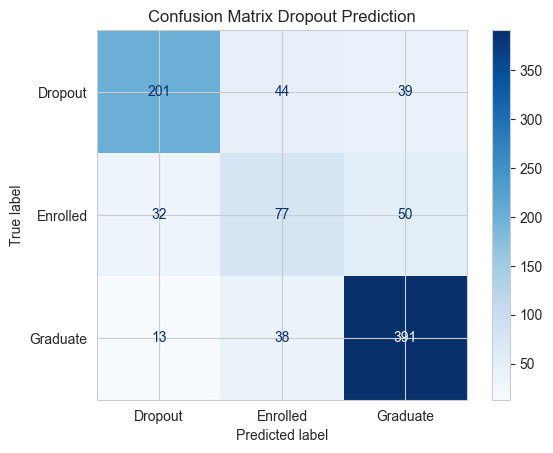

In [71]:
# Prediksi pada data test
y_pred = pipeline.predict(X_test)

# Menampilkan Classification Report
print("--- Classification Report ---")
# Gunakan le.classes_ (dari LabelEncoder) untuk label kelas
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Menampilkan Confusion Matrix
print("\n--- Confusion Matrix ---")
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        y_pred, 
                                        display_labels=le.classes_, 
                                        cmap=plt.cm.Blues)
plt.title('Confusion Matrix Dropout Prediction')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31716\1929759526.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


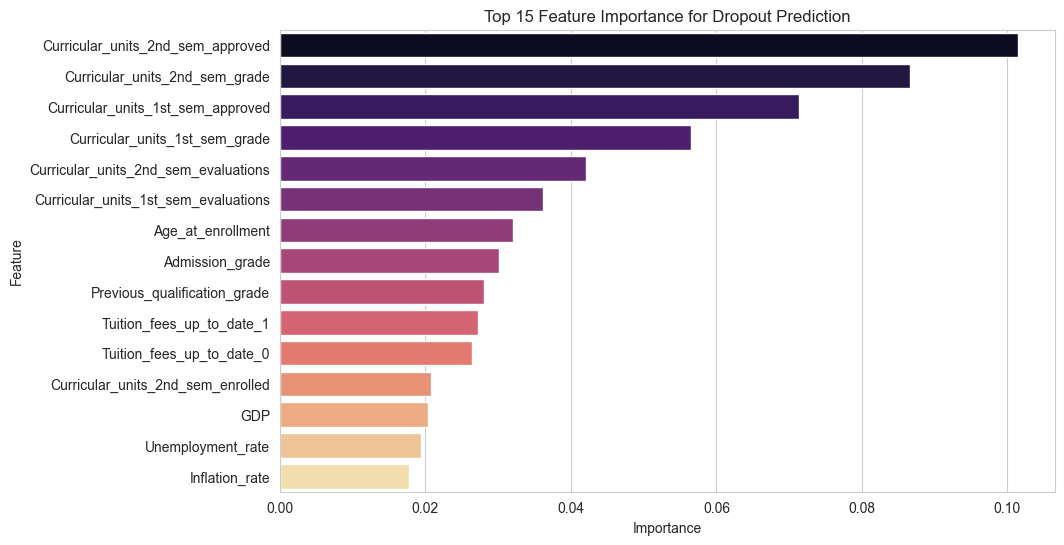

In [72]:
# --- Analisis Feature Importance ---
rf_model_trained = pipeline.named_steps['classifier']

# Gabungkan nama fitur numerik dan fitur kategorikal yang di-OHE
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
importances = rf_model_trained.feature_importances_

# Buat DataFrame dan visualisasi
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
plt.title('Top 15 Feature Importance for Dropout Prediction')
plt.show()